In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (38.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and di

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib

plt.rc('font', family='NanumBarunGothic')

In [3]:
data = pd.read_csv('/content/drive/MyDrive/DACON/물류 유통량 예측 경진대회/train.csv')
test = pd.read_csv('/content/drive/MyDrive/DACON/물류 유통량 예측 경진대회/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/DACON/물류 유통량 예측 경진대회/sample_submission.csv')

## 1. 데이터 전처리
- 결측치, 이상치 처리
- Feature Engineering

In [4]:
# 데이터 복제
df = data.copy()

### 1) 이상치, 결측치 확인

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


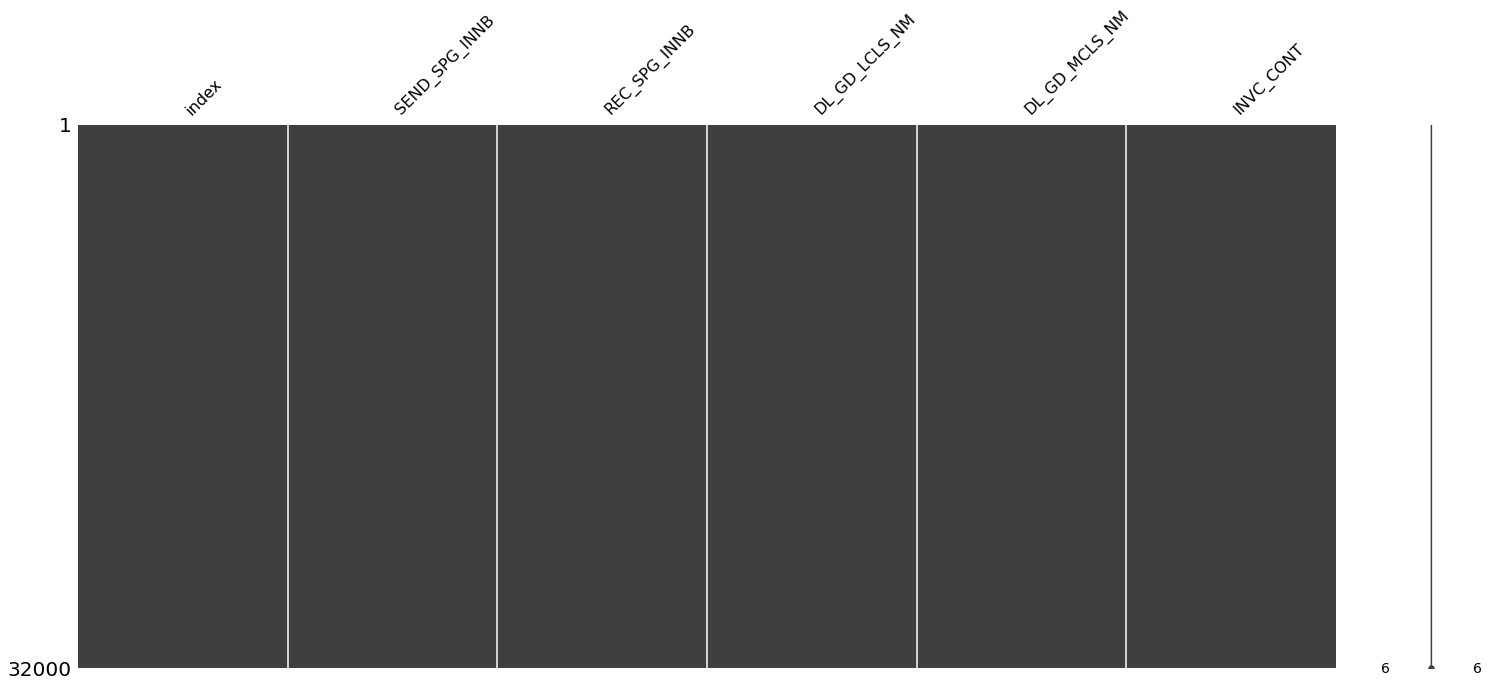

In [5]:
import missingno as msno

msno.matrix(df, sort='ascending')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          32000 non-null  int64  
 1   SEND_SPG_INNB  32000 non-null  float64
 2   REC_SPG_INNB   32000 non-null  float64
 3   DL_GD_LCLS_NM  32000 non-null  object 
 4   DL_GD_MCLS_NM  32000 non-null  object 
 5   INVC_CONT      32000 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.5+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          4640 non-null   int64  
 1   SEND_SPG_INNB  4640 non-null   float64
 2   REC_SPG_INNB   4640 non-null   float64
 3   DL_GD_LCLS_NM  4640 non-null   object 
 4   DL_GD_MCLS_NM  4640 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 181.4+ KB


### 2) 외부 데이터 수집
- 법정동 코드

In [8]:
# 법정동코드 10자리로 변환
df['SEND_RAW_DONG'] = df['SEND_SPG_INNB'].astype('str')
df['REC_RAW_DONG'] = df['REC_SPG_INNB'].astype('str')
df['SEND_RAW_DONG'] = [ df['SEND_RAW_DONG'][x][:2] for x in range(len(df)) ]
df['REC_RAW_DONG'] = [ df['REC_RAW_DONG'][x][:2] for x in range(len(df)) ]

In [9]:
# 법정동코드 10자리로 변환
test['SEND_RAW_DONG'] = test['SEND_SPG_INNB'].astype('str')
test['REC_RAW_DONG'] = test['REC_SPG_INNB'].astype('str')
test['SEND_RAW_DONG'] = [ test['SEND_RAW_DONG'][x][:2] for x in range(len(test)) ]
test['REC_RAW_DONG'] = [ test['REC_RAW_DONG'][x][:2] for x in range(len(test)) ]

In [10]:
df.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT,SEND_RAW_DONG,REC_RAW_DONG
0,0,1.129000e+15,5.011000e+15,패션의류,상의,3,11,50
1,1,1.135000e+15,5.011000e+15,생활/건강,반려동물,3,11,50
2,2,1.135000e+15,5.011000e+15,패션의류,기타패션의류,9,11,50
3,3,1.154500e+15,5.011000e+15,식품,농산물,10,11,50
4,4,1.165000e+15,5.011000e+15,식품,가공식품,3,11,50


In [11]:
# 법정동코드 데이터

df_raw = pd.read_excel('/content/drive/MyDrive/DACON/물류 유통량 예측 경진대회/법정동코드.xlsx')

raw_lst = {}
for x, y in zip(df_raw['법정동코드'], df_raw['지역']) :
  raw_lst[x] = y

### 3) Feature Engineering

In [12]:
# 시도명으로 변환
df['SEND_RAW_DONG'] = df['SEND_RAW_DONG'].apply(lambda x : raw_lst[int(x)])
df['REC_RAW_DONG'] = df['REC_RAW_DONG'].apply(lambda x : raw_lst[int(x)])

In [13]:
# 시도명으로 변환
test['SEND_RAW_DONG'] = test['SEND_RAW_DONG'].apply(lambda x : raw_lst[int(x)])
test['REC_RAW_DONG'] = test['REC_RAW_DONG'].apply(lambda x : raw_lst[int(x)])

In [14]:
df['SEND_RAW_DONG'].value_counts()

제주특별자치도    25344
경기도         3950
서울특별시        859
대전광역시        231
부산광역시        187
대구광역시        185
충청북도         184
충청남도         175
경상북도         171
전라북도         163
인천광역시        132
전라남도         124
강원도          118
경상남도          99
광주광역시         46
울산광역시         28
세종특별자치시        4
Name: SEND_RAW_DONG, dtype: int64

In [15]:
df['REC_RAW_DONG'].value_counts()

경기도        7061
제주특별자치도    6833
서울특별시      4984
부산광역시      1548
인천광역시      1419
경상남도       1397
충청남도       1193
경상북도       1138
전라북도        942
대구광역시       911
전라남도        885
강원도         874
충청북도        770
대전광역시       682
광주광역시       636
울산광역시       544
세종특별자치시     183
Name: REC_RAW_DONG, dtype: int64

#### - 이동 경로 변수 추가

In [16]:
# 제주도 -> 제주도  => only제주
# 제주도 -> 기타 지역 => 제주to기타
# 기타지역 -> 제주도 => 기타to제주

df['PATH'] = df['SEND_RAW_DONG'].copy()
df.loc[ (df['SEND_RAW_DONG'] != '제주특별자치도') &  (df['REC_RAW_DONG'] == '제주특별자치도') , 'PATH'] = 'etc_to_jeju'
df.loc[ (df['SEND_RAW_DONG'] == '제주특별자치도') &  (df['REC_RAW_DONG'] == '제주특별자치도') ,'PATH'] = 'jeju_to_jeju'
df.loc[ (df['SEND_RAW_DONG'] == '제주특별자치도') &  (df['REC_RAW_DONG'] != '제주특별자치도') ,'PATH'] = 'jeju_to_etc'

In [17]:
# 제주도 -> 제주도  => only제주
# 제주도 -> 기타 지역 => 제주to기타
# 기타지역 -> 제주도 => 기타to제주

test['PATH'] = test['SEND_RAW_DONG'].copy()
test.loc[ (test['SEND_RAW_DONG'] != '제주특별자치도') &  (test['REC_RAW_DONG'] == '제주특별자치도') , 'PATH'] = 'etc_to_jeju'
test.loc[ (test['SEND_RAW_DONG'] == '제주특별자치도') &  (test['REC_RAW_DONG'] == '제주특별자치도') ,'PATH'] = 'jeju_to_jeju'
test.loc[ (test['SEND_RAW_DONG'] == '제주특별자치도') &  (test['REC_RAW_DONG'] != '제주특별자치도') ,'PATH'] = 'jeju_to_etc'

In [18]:
df.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT,SEND_RAW_DONG,REC_RAW_DONG,PATH
0,0,1.129000e+15,5.011000e+15,패션의류,상의,3,서울특별시,제주특별자치도,etc_to_jeju
1,1,1.135000e+15,5.011000e+15,생활/건강,반려동물,3,서울특별시,제주특별자치도,etc_to_jeju
2,2,1.135000e+15,5.011000e+15,패션의류,기타패션의류,9,서울특별시,제주특별자치도,etc_to_jeju
3,3,1.154500e+15,5.011000e+15,식품,농산물,10,서울특별시,제주특별자치도,etc_to_jeju
4,4,1.165000e+15,5.011000e+15,식품,가공식품,3,서울특별시,제주특별자치도,etc_to_jeju


#### - 네이버 트렌드 점수 (2020년 1월 기준)

In [19]:
trend_score = pd.read_excel('/content/drive/MyDrive/DACON/물류 유통량 예측 경진대회/네이버_데이터랩_트렌드점수_202001.xlsx')
trend_score_dict = {}
for x, y in zip(trend_score['카테고리'], trend_score['트렌드점수']) :
  trend_score_dict[x] = y
trend_score_dict

{'디지털/가전': 100, '생활/건강': 100, '식품': 52, '여행/문화': 9, '패션의류': 82, '화장품/미용': 27}

In [20]:
df['TREND_SCORE'] = df['DL_GD_LCLS_NM'].apply(lambda x : trend_score_dict[x])

In [21]:
test['TREND_SCORE'] = test['DL_GD_LCLS_NM'].apply(lambda x : trend_score_dict[x])

In [22]:
df

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT,SEND_RAW_DONG,REC_RAW_DONG,PATH,TREND_SCORE
0,0,1.129000e+15,5.011000e+15,패션의류,상의,3,서울특별시,제주특별자치도,etc_to_jeju,82
1,1,1.135000e+15,5.011000e+15,생활/건강,반려동물,3,서울특별시,제주특별자치도,etc_to_jeju,100
2,2,1.135000e+15,5.011000e+15,패션의류,기타패션의류,9,서울특별시,제주특별자치도,etc_to_jeju,82
3,3,1.154500e+15,5.011000e+15,식품,농산물,10,서울특별시,제주특별자치도,etc_to_jeju,52
4,4,1.165000e+15,5.011000e+15,식품,가공식품,3,서울특별시,제주특별자치도,etc_to_jeju,52
...,...,...,...,...,...,...,...,...,...,...
31995,31995,5.011000e+15,2.635000e+15,식품,농산물,6,제주특별자치도,부산광역시,jeju_to_etc,52
31996,31996,5.011000e+15,1.168000e+15,식품,기타식품,5,제주특별자치도,서울특별시,jeju_to_etc,52
31997,31997,5.011000e+15,4.119700e+15,식품,농산물,9,제주특별자치도,경기도,jeju_to_etc,52
31998,31998,5.011000e+15,1.132000e+15,식품,농산물,3,제주특별자치도,서울특별시,jeju_to_etc,52


## 2. EDA(데이터 탐색)

In [23]:
df_path_mean = df.groupby('PATH')['INVC_CONT'].mean()
df_path_mean

PATH
etc_to_jeju     5.803185
jeju_to_etc     4.485755
jeju_to_jeju    5.949153
Name: INVC_CONT, dtype: float64

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


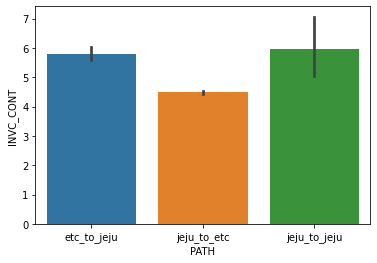

In [24]:
fig, ax = plt.subplots(1,1)
sns.barplot(data=df, x='PATH', y='INVC_CONT')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54056 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_

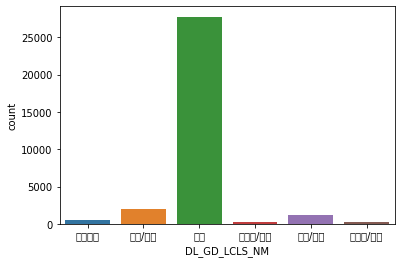

In [25]:
fig, ax = plt.subplots(1,1)
sns.countplot(data=df, x='DL_GD_LCLS_NM')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54056 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_

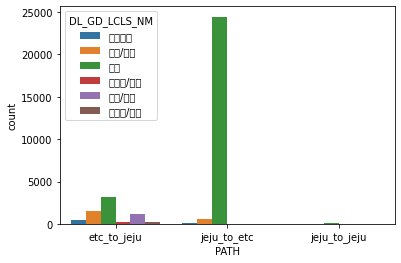

In [26]:
fig, ax = plt.subplots(1,1)
sns.countplot(data=df, x='PATH', hue='DL_GD_LCLS_NM')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54056 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_

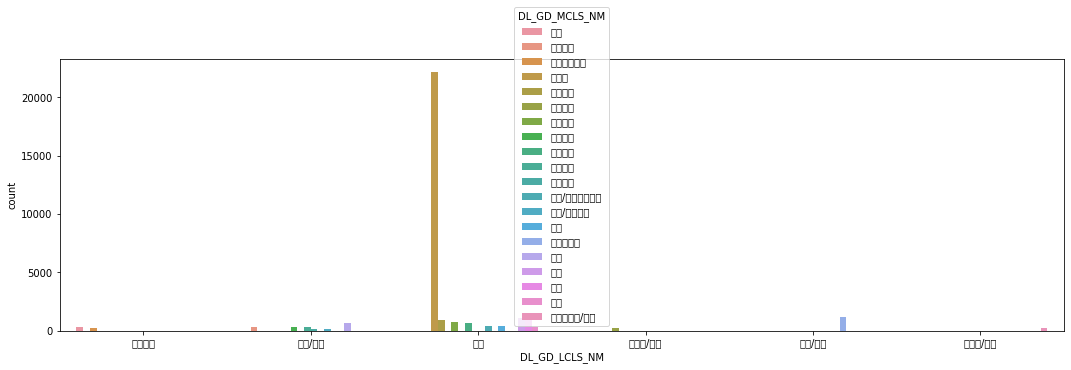

In [27]:
plt.figure(figsize=(18,5))
sns.countplot(data=df, x='DL_GD_LCLS_NM', hue='DL_GD_MCLS_NM')
plt.show()

## 3. 모델링


### 1) 라벨 인코딩

In [28]:
df.columns

Index(['index', 'SEND_SPG_INNB', 'REC_SPG_INNB', 'DL_GD_LCLS_NM',
       'DL_GD_MCLS_NM', 'INVC_CONT', 'SEND_RAW_DONG', 'REC_RAW_DONG', 'PATH',
       'TREND_SCORE'],
      dtype='object')

In [29]:
x_train = df[['DL_GD_LCLS_NM', 'DL_GD_MCLS_NM', 'SEND_RAW_DONG', 'REC_RAW_DONG', 'PATH','TREND_SCORE']]
y_train = df['INVC_CONT']

In [30]:
x_test = test[['DL_GD_LCLS_NM', 'DL_GD_MCLS_NM', 'SEND_RAW_DONG', 'REC_RAW_DONG', 'PATH','TREND_SCORE']]

In [31]:
x_train = pd.get_dummies(x_train, columns = ['DL_GD_LCLS_NM', 'DL_GD_MCLS_NM', 'SEND_RAW_DONG', 'REC_RAW_DONG', 'PATH'])

In [32]:
x_test = pd.get_dummies(x_test, columns = ['DL_GD_LCLS_NM', 'DL_GD_MCLS_NM', 'SEND_RAW_DONG', 'REC_RAW_DONG', 'PATH'])

In [33]:
# test set 컬럼 맞추기
x_test['SEND_RAW_DONG_울산광역시'] = 0

In [34]:
col = x_train.columns
x_test = x_test[col]

### 2) 스케일링

In [35]:
#from sklearn.preprocessing import StandardScaler

# stand = StandardScaler()
# x_train = stand.fit_transform(x_train)
# x_test = stand.transform(x_test)

### 3) Cross Validation

In [36]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [37]:
print('Train: %s, Test: %s' % (x_tr.shape, x_val.shape))

Train: (25600, 64), Test: (6400, 64)


### 4) 모델링 테스트

In [38]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [39]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error

In [40]:
# get a list of base models
def get_models() :

  models = []
  models.append(('lr', LinearRegression()))
  models.append(('lasso', Lasso()))
  models.append(('ridge', Ridge()))
  models.append(('ela', ElasticNet()))
  models.append(('mlp', MLPRegressor()))
  models.append(('knn', KNeighborsRegressor()))
  models.append(('rf', RandomForestRegressor()))
  models.append(('gdb', GradientBoostingRegressor()))
  models.append(('ada', AdaBoostRegressor()))
  models.append(('xgb', XGBRegressor()))
  models.append(('lgb', LGBMRegressor()))
  models.append(('cat', CatBoostRegressor(verbose=False)))

  return models

In [41]:
# RMSE
def rmse(y_true, y_pred) :
  return np.sqrt(mean_squared_error(y_true, y_pred))

In [42]:
models = get_models()

# evaluate standalone model
for name, model in models:
  # fit the model on the training dataset
  model.fit(x_tr, y_tr)
  # make a prediction on the test dataset
  y_pred_train = model.predict(x_tr)
  # evaluate the predictions
  train_score = rmse(y_tr, y_pred_train)
  print('>%s Train RMSE: %.3f' % (name, train_score))
  y_pred_valid = model.predict(x_val)
  valid_score = rmse(y_val, y_pred_valid)
  # report the score
  print('>%s Valid RMSE: %.3f' % (name, valid_score))

>lr Train RMSE: 0.455
>lr Valid RMSE: 0.456
>lasso Train RMSE: 0.467
>lasso Valid RMSE: 0.468
>ridge Train RMSE: 0.455
>ridge Valid RMSE: 0.456
>ela Train RMSE: 0.467
>ela Valid RMSE: 0.468
>mlp Train RMSE: 0.456
>mlp Valid RMSE: 0.457
>knn Train RMSE: 0.481
>knn Valid RMSE: 0.488
>rf Train RMSE: 0.445
>rf Valid RMSE: 0.460
>gdb Train RMSE: 0.451
>gdb Valid RMSE: 0.456
>ada Train RMSE: 0.538
>ada Valid RMSE: 0.539
[10:52:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
>xgb Train RMSE: 0.451
>xgb Valid RMSE: 0.455
>lgb Train RMSE: 0.449
>lgb Valid RMSE: 0.455
>cat Train RMSE: 0.445
>cat Valid RMSE: 0.459


In [43]:
# 하이퍼 파라메터 튜닝
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5]
max_depth = [1,2,3,4,5]
n_estimators = [50, 100, 500, 1000, 2000]

predict_dict = {}

for r in learning_rate :
  for d in max_depth :
    for n in n_estimators :
      print("learning_rate : ", r)
      print("max_depth : ", d)
      print("n_estimators : ", n)
      cat = CatBoostRegressor(n_estimators=n, learning_rate=r, max_depth=d, verbose=False)
      cat.fit(x_tr, y_tr)
      y_pred = cat.predict(x_val)
      score = rmse(y_val, y_pred)
      print('> valid RMSE: %.3f' % (score))
      print('valid score : ', cat.score(x_val, y_val))
      print('='*100)

learning_rate :  0.001
max_depth :  1
n_estimators :  50
> valid RMSE: 0.467
valid score :  0.0025140416426977508
learning_rate :  0.001
max_depth :  1
n_estimators :  100
> valid RMSE: 0.467
valid score :  0.004801973567522322
learning_rate :  0.001
max_depth :  1
n_estimators :  500
> valid RMSE: 0.464
valid score :  0.016882522414465972
learning_rate :  0.001
max_depth :  1
n_estimators :  1000
> valid RMSE: 0.463
valid score :  0.023000513620080487
learning_rate :  0.001
max_depth :  1
n_estimators :  2000
> valid RMSE: 0.461
valid score :  0.028668772027142686
learning_rate :  0.001
max_depth :  2
n_estimators :  50
> valid RMSE: 0.467
valid score :  0.002699598142493098
learning_rate :  0.001
max_depth :  2
n_estimators :  100
> valid RMSE: 0.467
valid score :  0.005162457216596694
learning_rate :  0.001
max_depth :  2
n_estimators :  500
> valid RMSE: 0.464
valid score :  0.018718004892103735
learning_rate :  0.001
max_depth :  2
n_estimators :  1000
> valid RMSE: 0.462
valid sc

In [44]:
# learning_rate :  0.5
# max_depth :  1
# n_estimators :  50
# >cat valid RMSE: 4.611
# valid score :  0.02205754934032811

In [48]:
cat= CatBoostRegressor(learning_rate=0.1, max_depth=5, n_estimators=100, verbose=False)
cat.fit(x_tr, y_tr)
result = cat.predict(x_test)

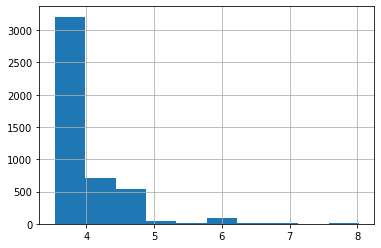

In [49]:
submission['INVC_CONT'] = result
submission['INVC_CONT'].hist()

In [50]:
submission.to_csv('/content/drive/MyDrive/DACON/물류 유통량 예측 경진대회/cat_model_result2.csv', index=False)